# Curso de Big Data

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Miércoles 4 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- También deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/11nJY1Frgla45sTgsPiSeOZM9iBM-XRWh/edit?usp=sharing&ouid=105815768529474116534&rtpof=true&sd=true
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se  corregirán sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [22]:
# Intalar biblioteca necesaria
#!pip install requests 

# Importar biblioteca para trabajar con la API
import requests

# Definir la cadena de texto con el nombre del producto que queremos buscar. En este caso, un texto de Proust
buscar = "En busca del tiempo perdido Proust"

# Crear la URL para la API de búsqueda de MercadoLibre, con "MLA" como identificador de MercadoLibre Argentina
# Se reemplazan los espacios en blanco en la cadena 'buscar' con '%20' para formatear correctamente la URL
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Realiza una solicitud GET a la URL para obtener los datos de la búsqueda
response = requests.get(url)

# Convertir la respuesta, que está en formato JSON, a un diccionario de Python.
data = response.json()

# Imprimir la cantidad de resultados obtenidos en la búsqueda.
print('Longitud de lista de resultados:', len(data['results']))

Longitud de lista de resultados: 50


#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [23]:
import pandas as pd

# Creando un dataframe con los precios de los ítems obtenidos 
df = pd.DataFrame([item['price'] for item in data['results']], columns=['Precio'])

# Calculando el precio promedio, mínimo y máximo
precio_promedio = df['Precio'].mean()
precio_minimo = df['Precio'].min()
precio_maximo = df['Precio'].max()

print("Precio promedio:", precio_promedio)
print("Precio mínimo:", precio_minimo)
print("Precio máximo:", precio_maximo)

Precio promedio: 13019.38
Precio mínimo: 7180
Precio máximo: 64000


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

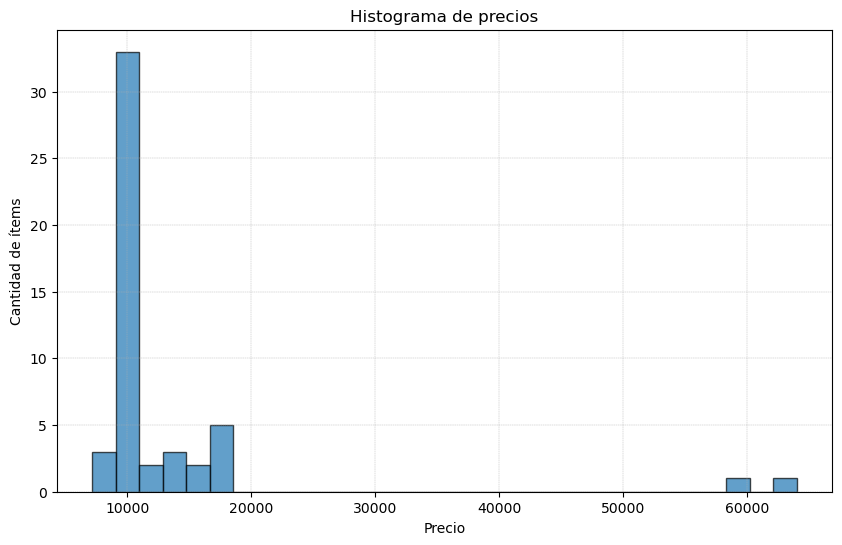

In [9]:
#pip install matplotlib

import matplotlib.pyplot as plt

# Creando un histograma con Matplotlib
plt.figure(figsize=(10,6))
plt.hist(df['Precio'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histograma de precios')
plt.xlabel('Precio')
plt.ylabel('Cantidad de ítems')
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
plt.show()

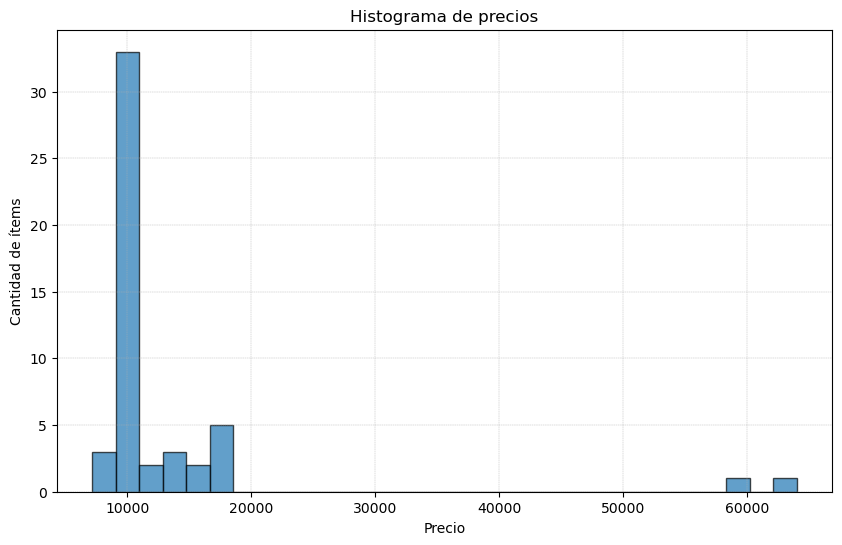

In [17]:
# Una opción posible más, método hist directamente desde el dataframe df

df['Precio'].hist(bins=30, edgecolor='black', alpha=0.7, figsize=(10,6))
plt.title('Histograma de precios')
plt.xlabel('Precio')
plt.ylabel('Cantidad de ítems')
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
plt.show()

Encontramos 2 outliers en la cola derecha de la distribución: el primero en `$`59.000 y el segundo `$`64.000.